In [42]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np


In [ ]:
# Getting the data of Top100 most popular Karaoke Songs

In [6]:
datei_pfad = '/Users/sebastianbrockschmidt/Desktop/EDA Karaoke/top100_karaoke.txt'

with open(datei_pfad, 'r', encoding='utf-8') as file:
    zeilen = file.readlines()

zeilen = [zeile.strip() for zeile in zeilen]

top100 = pd.DataFrame(zeilen, columns=['Text'])

top100.head()


,Text
0,Shotgun by George Ezra
1,Sweet Caroline by Neil Diamond
2,Shallow by Lady Gaga & Bradley Cooper (A Star ...
3,A Million Dreams by The Greatest Showman
4,Perfect by Ed Sheeran


In [7]:
top100.shape

(100, 1)

In [110]:
top100

,Text
0,Shotgun by George Ezra
1,Sweet Caroline by Neil Diamond
2,Shallow by Lady Gaga & Bradley Cooper (A Star ...
3,A Million Dreams by The Greatest Showman
4,Perfect by Ed Sheeran
5,This Is Me by The Greatest Showman
6,Someone You Loved by Lewis Capaldi
7,Rewrite The Stars by The Greatest Showman
8,Angels by Robbie Williams
9,The Greatest Show by The Greatest Showman


In [8]:
def split_by_last(text):
    if " by " in text:
        parts = text.rsplit(" by ", 1)
        return parts[0], parts[1]
    else:
        return text, ""

top100[['song', 'artist']] = top100['Text'].apply(lambda x: pd.Series(split_by_last(x)))

top100.drop('Text', axis=1, inplace=True)
top100.head()

,song,artist
0,Shotgun,George Ezra
1,Sweet Caroline,Neil Diamond
2,Shallow,Lady Gaga & Bradley Cooper (A Star is Born)
3,A Million Dreams,The Greatest Showman
4,Perfect,Ed Sheeran


In [ ]:
# Getting Track IDs from Spotify

In [9]:

access_token = 'API_KEY'

search_url = "https://api.spotify.com/v1/search"

headers = {
    "Authorization": f"Bearer {access_token}"
}

def get_track_id(song, artist):
    query = f"track:{song} artist:{artist}"
    params = {
        "q": query,
        "type": "track",
        "limit": 1  # Wir wollen nur den ersten Treffer
    }
    
    response = requests.get(search_url, headers=headers, params=params)
    
    if response.status_code != 200:
        print(f"Fehler: HTTP {response.status_code}")
        print(response.text)
        return None
    
    try:
        results = response.json()
    except ValueError:
        print("Fehler beim Dekodieren der JSON-Antwort")
        print(response.text)
        return None
    
    if 'tracks' in results and results['tracks']['items']:
        return results['tracks']['items'][0]['id']
    else:
        print("Kein passender Track gefunden.")
        return None


top100['track_id'] = top100.apply(lambda row: get_track_id(row['song'], row['artist']), axis=1)

Kein passender Track gefunden.
Kein passender Track gefunden.
Kein passender Track gefunden.
Kein passender Track gefunden.


In [10]:
top100

,song,artist,track_id
0,Shotgun,George Ezra,4ofwffwvvnbSkrMSCKQDaC
1,Sweet Caroline,Neil Diamond,62AuGbAkt8Ox2IrFFb8GKV
2,Shallow,Lady Gaga & Bradley Cooper (A Star is Born),2VxeLyX666F8uXCJ0dZF8B
3,A Million Dreams,The Greatest Showman,6yqbH2bs1Um8g44ldCVrUf
4,Perfect,Ed Sheeran,0tgVpDi06FyKpA1z0VMD4v
5,This Is Me,The Greatest Showman,45aBsnKRWUzhwbcqOJLwfe
6,Someone You Loved,Lewis Capaldi,7qEHsqek33rTcFNT9PFqLf
7,Rewrite The Stars,The Greatest Showman,70k0l3JIdJP67nrJ3lOST7
8,Angels,Robbie Williams,1M2nd8jNUkkwrc1dgBPTJz
9,The Greatest Show,The Greatest Showman,4ylWMuGbMXNDgDd8lErEle


In [ ]:
# Getting missing Track IDs manually

In [11]:
no_track_id_rows = top100[top100['track_id'].isnull()]
no_track_id_rows

,song,artist,track_id
64,Don't Look Back In Anger,Oasis,None
68,That's Life,Frank Sinatra,None
86,The Shape Of You,Ed Sheeran,None
98,I'll Never Love Again,Lady Gaga and Bradley Cooper,None


In [12]:
top100.loc[top100['song'] == "That's Life", 'track_id'] = '4FmCUATNIarCQh72JYdvnm'
top100.loc[top100['song'] == "Don't Look Back In Anger", 'track_id'] = '12dU3vAh6AFoJkisorfoUl'
top100.loc[top100['song'] == "The Shape Of You", 'track_id'] = '7qiZfU4dY1lWllzX7mPBI3'
top100.loc[top100['song'] == "I'll Never Love Again", 'track_id'] = '3DKpA54hrFIdPN6AtL9HXa'

In [13]:
no_track_id_rows = top100[top100['track_id'].isnull()]
no_track_id_rows

,song,artist,track_id


In [14]:
top100backup = top100.copy()

In [ ]:
# Getting Track Information from Spotify

In [15]:

access_token = 'API_KEY'

track_url_template = "https://api.spotify.com/v1/tracks/{track_id}"
audio_features_url_template = "https://api.spotify.com/v1/audio-features/{track_id}"
audio_analysis_url_template = "https://api.spotify.com/v1/audio-analysis/{track_id}"

headers = {
    "Authorization": f"Bearer {access_token}"
}

top100['track_info'] = None
top100['audio_features'] = None
top100['audio_analysis'] = None

def fetch_spotify_data(track_id):
    
    track_url = track_url_template.format(track_id=track_id)
    track_response = requests.get(track_url, headers=headers)
    if track_response.status_code == 200:
        track_info = track_response.json()
    else:
        track_info = None
    
    audio_features_url = audio_features_url_template.format(track_id=track_id)
    audio_features_response = requests.get(audio_features_url, headers=headers)
    if audio_features_response.status_code == 200:
        audio_features = audio_features_response.json()
    else:
        audio_features = None

    audio_analysis_url = audio_analysis_url_template.format(track_id=track_id)
    audio_analysis_response = requests.get(audio_analysis_url, headers=headers)
    if audio_analysis_response.status_code == 200:
        audio_analysis = audio_analysis_response.json()
    else:
        audio_analysis = None
    
    return track_info, audio_features, audio_analysis

for index, row in top100.iterrows():
    track_id = row['track_id']
    track_info, audio_features, audio_analysis = fetch_spotify_data(track_id)
    
    top100.at[index, 'track_info'] = track_info
    top100.at[index, 'audio_features'] = audio_features
    top100.at[index, 'audio_analysis'] = audio_analysis


top100


,song,artist,track_id,track_info,audio_features,audio_analysis
0,Shotgun,George Ezra,4ofwffwvvnbSkrMSCKQDaC,"{'album': {'album_type': 'album', 'artists': [...","{'danceability': 0.673, 'energy': 0.735, 'key'...","{'meta': {'analyzer_version': '4.0.0', 'platfo..."
1,Sweet Caroline,Neil Diamond,62AuGbAkt8Ox2IrFFb8GKV,"{'album': {'album_type': 'album', 'artists': [...","{'danceability': 0.529, 'energy': 0.127, 'key'...","{'meta': {'analyzer_version': '4.0.0', 'platfo..."
2,Shallow,Lady Gaga & Bradley Cooper (A Star is Born),2VxeLyX666F8uXCJ0dZF8B,"{'album': {'album_type': 'album', 'artists': [...","{'danceability': 0.577, 'energy': 0.385, 'key'...","{'meta': {'analyzer_version': '4.0.0', 'platfo..."
3,A Million Dreams,The Greatest Showman,6yqbH2bs1Um8g44ldCVrUf,"{'album': {'album_type': 'single', 'artists': ...","{'danceability': 0.0881, 'energy': 0.129, 'key...","{'meta': {'analyzer_version': '4.0.0', 'platfo..."
4,Perfect,Ed Sheeran,0tgVpDi06FyKpA1z0VMD4v,"{'album': {'album_type': 'album', 'artists': [...","{'danceability': 0.599, 'energy': 0.448, 'key'...","{'meta': {'analyzer_version': '4.0.0', 'platfo..."
5,This Is Me,The Greatest Showman,45aBsnKRWUzhwbcqOJLwfe,"{'album': {'album_type': 'compilation', 'artis...","{'danceability': 0.284, 'energy': 0.704, 'key'...","{'meta': {'analyzer_version': '4.0.0', 'platfo..."
6,Someone You Loved,Lewis Capaldi,7qEHsqek33rTcFNT9PFqLf,"{'album': {'album_type': 'album', 'artists': [...","{'danceability': 0.501, 'energy': 0.405, 'key'...","{'meta': {'analyzer_version': '4.0.0', 'platfo..."
7,Rewrite The Stars,The Greatest Showman,70k0l3JIdJP67nrJ3lOST7,"{'album': {'album_type': 'album', 'artists': [...","{'danceability': 0.432, 'energy': 0.149, 'key'...","{'meta': {'analyzer_version': '4.0.0', 'platfo..."
8,Angels,Robbie Williams,1M2nd8jNUkkwrc1dgBPTJz,"{'album': {'album_type': 'album', 'artists': [...","{'danceability': 0.429, 'energy': 0.594, 'key'...","{'meta': {'analyzer_version': '4.0.0', 'platfo..."
9,The Greatest Show,The Greatest Showman,4ylWMuGbMXNDgDd8lErEle,"{'album': {'album_type': 'compilation', 'artis...","{'danceability': 0.417, 'energy': 0.824, 'key'...","{'meta': {'analyzer_version': '4.0.0', 'platfo..."


In [ ]:
# Retry if there is inclompete Information

In [182]:


access_token = 'BQC_hwPA6Z688QiJOZBjvSmAeZbPUYJA5JMQIwNZdkum3sKG8IHjaswPCG9ocOj4lWA7uakCcxZHCM7VgfTZmvY3d6ExK5zKqNleiiNCNrDJIUU7o_I'

track_url_template = "https://api.spotify.com/v1/tracks/{track_id}"
audio_features_url_template = "https://api.spotify.com/v1/audio-features/{track_id}"
audio_analysis_url_template = "https://api.spotify.com/v1/audio-analysis/{track_id}"

headers = {
    "Authorization": f"Bearer {access_token}"
}

def fetch_spotify_data(track_id):
    
    track_url = track_url_template.format(track_id=track_id)
    track_response = requests.get(track_url, headers=headers)
    if track_response.status_code == 200:
        track_info = track_response.json()
    else:
        track_info = None
    
    audio_features_url = audio_features_url_template.format(track_id=track_id)
    audio_features_response = requests.get(audio_features_url, headers=headers)
    if audio_features_response.status_code == 200:
        audio_features = audio_features_response.json()
    else:
        audio_features = None

    audio_analysis_url = audio_analysis_url_template.format(track_id=track_id)
    audio_analysis_response = requests.get(audio_analysis_url, headers=headers)
    if audio_analysis_response.status_code == 200:
        audio_analysis = audio_analysis_response.json()
    else:
        audio_analysis = None
    
    return track_info, audio_features, audio_analysis


def retry_failed_requests(df):
    for index, row in df.iterrows():
        if row['track_info'] is None or row['audio_features'] is None or row['audio_analysis'] is None:
            track_id = row['track_id']
            print(f"Retrying for track_id: {track_id}")
            track_info, audio_features, audio_analysis = fetch_spotify_data(track_id)
            
            if track_info is not None:
                df.at[index, 'track_info'] = track_info
            if audio_features is not None:
                df.at[index, 'audio_features'] = audio_features
            if audio_analysis is not None:
                df.at[index, 'audio_analysis'] = audio_analysis

for index, row in top100.iterrows():
    track_id = row['track_id']
    track_info, audio_features, audio_analysis = fetch_spotify_data(track_id)
    
    top100.at[index, 'track_info'] = track_info
    top100.at[index, 'audio_features'] = audio_features
    top100.at[index, 'audio_analysis'] = audio_analysis

retry_failed_requests(top100)


Retrying for track_id: 4ofwffwvvnbSkrMSCKQDaC
Retrying for track_id: 1B5Tp2Ml9nLlmTSJx8xVfI
Retrying for track_id: 6zC0mpGYwbNTpk9SKwh08f
Retrying for track_id: 1h9JJkK1rEqMrkuuU4vRSP


In [ ]:
# Checking Distributions of Audio Features of Top 100 Karaoke Songs

/var/folders/nt/x7knb0nj29bbk77zhhv8mz8c0000gn/T/ipykernel_21614/3748317710.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top100['danceability'] = top100['audio_features'].apply(lambda x: x['danceability'] if x else None)
/var/folders/nt/x7knb0nj29bbk77zhhv8mz8c0000gn/T/ipykernel_21614/3748317710.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top100['energy'] = top100['audio_features'].apply(lambda x: x['energy'] if x else None)
/var/folders/nt/x7knb0nj29bbk77zhhv8mz8c0000gn/T/ipykernel_21614/374

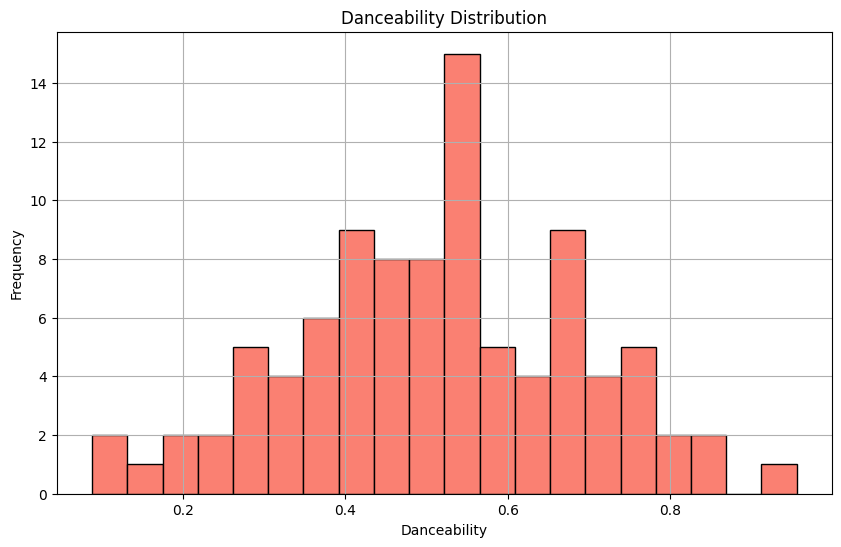

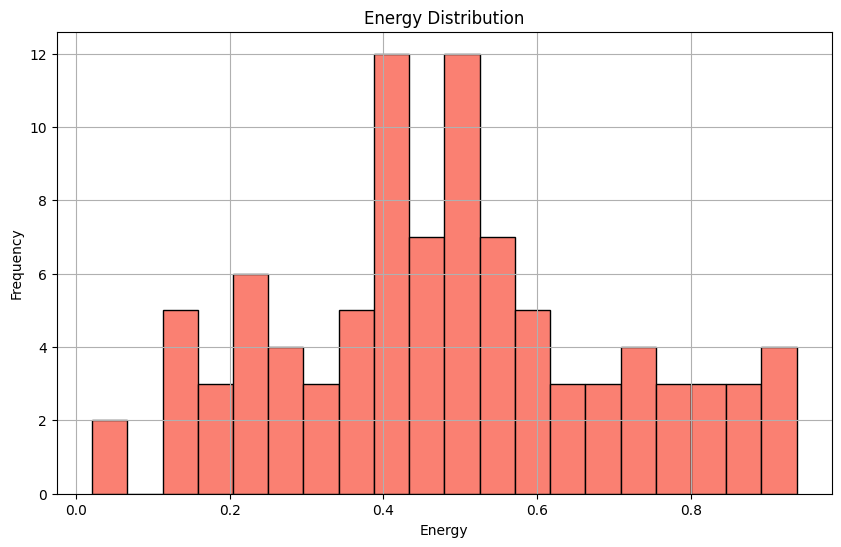

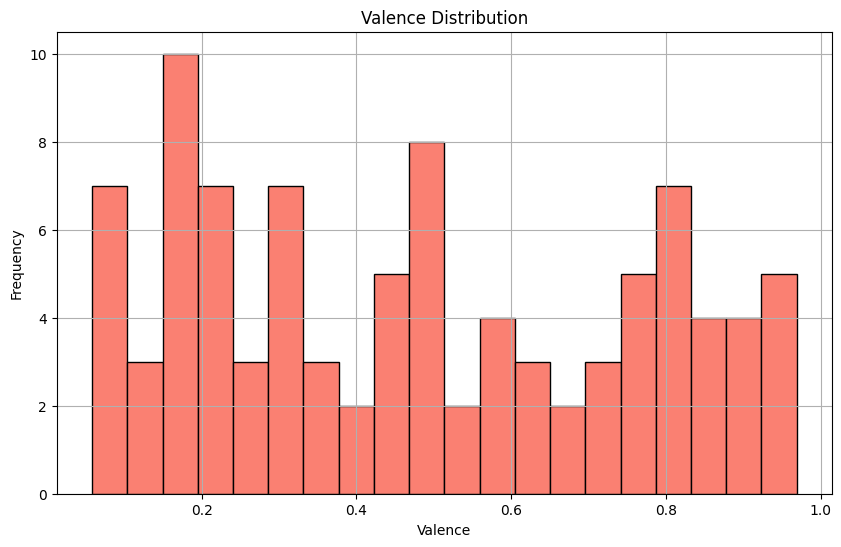

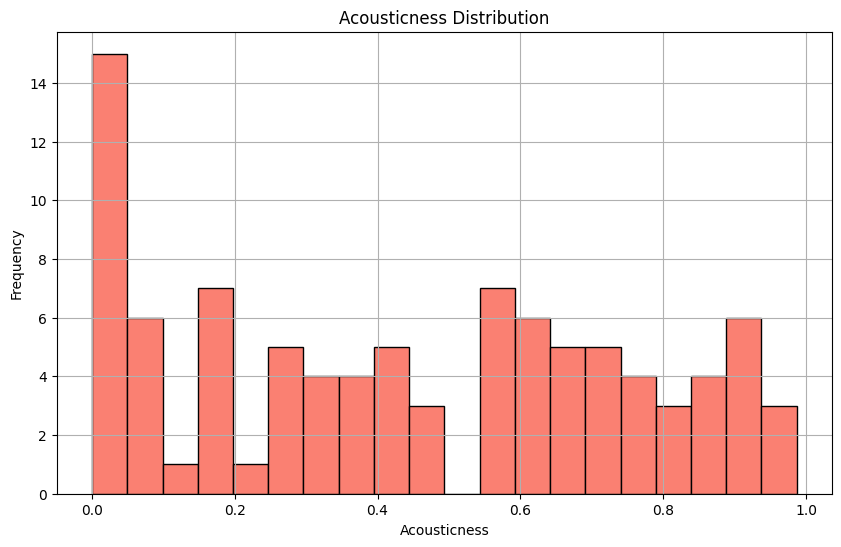

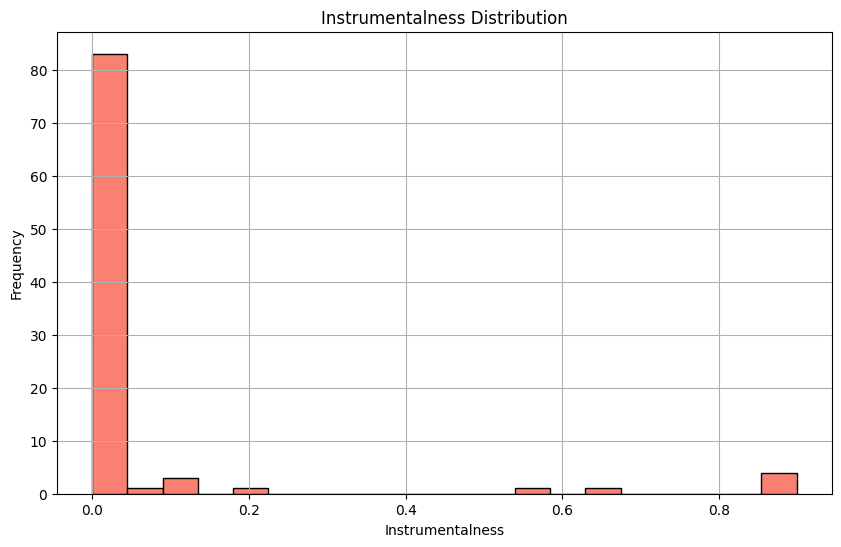

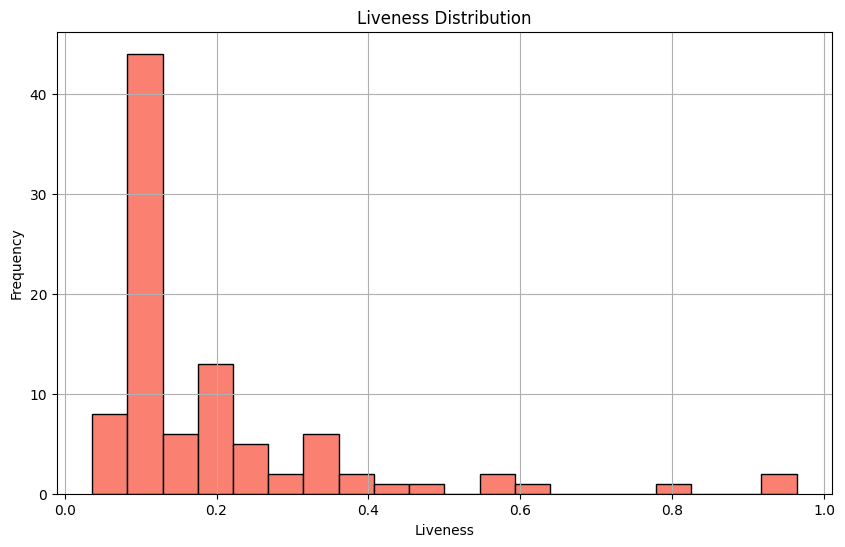

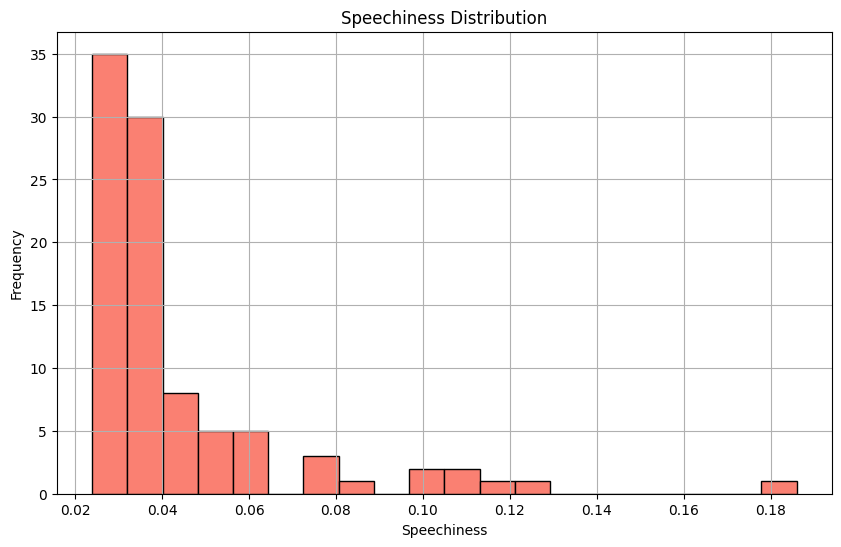

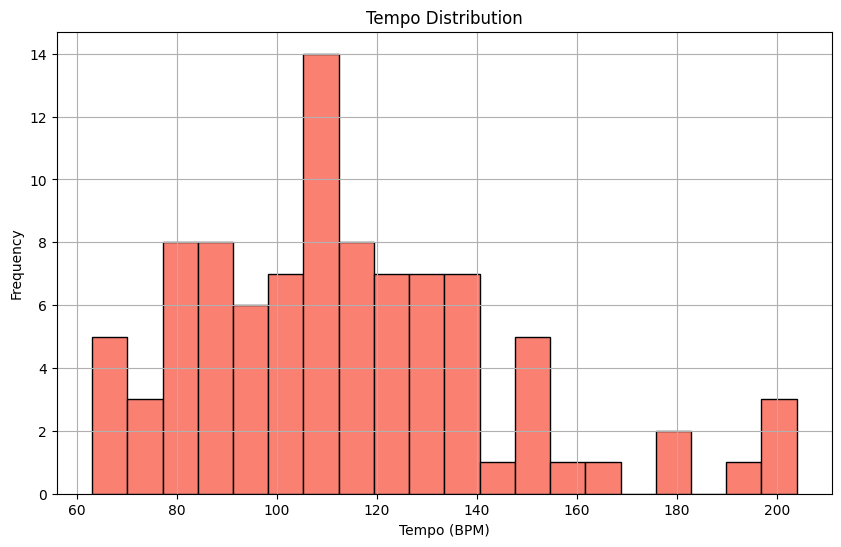

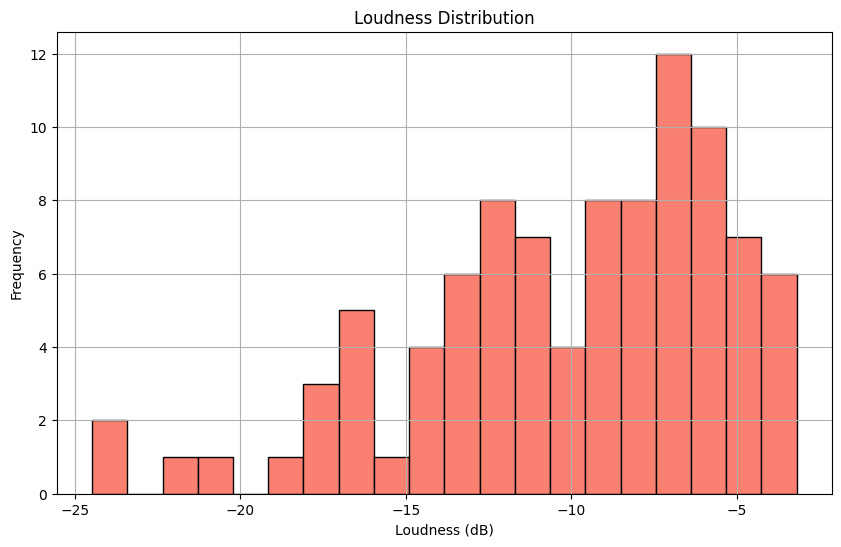

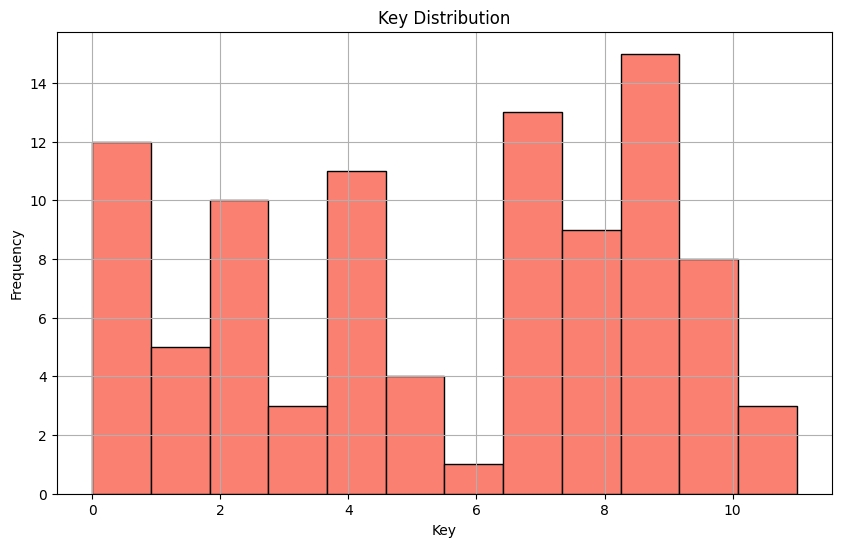

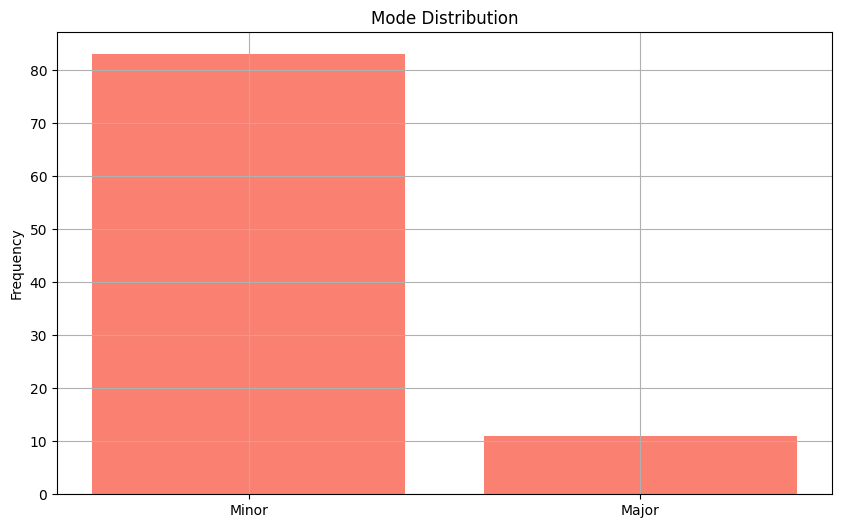

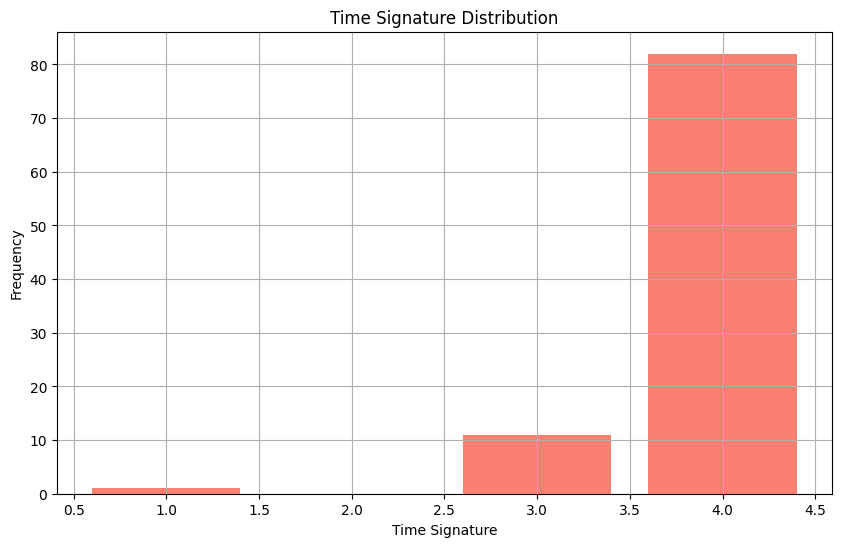

In [46]:
import matplotlib.pyplot as plt

top100['danceability'] = top100['audio_features'].apply(lambda x: x['danceability'] if x else None)
top100['energy'] = top100['audio_features'].apply(lambda x: x['energy'] if x else None)
top100['valence'] = top100['audio_features'].apply(lambda x: x['valence'] if x else None)
top100['acousticness'] = top100['audio_features'].apply(lambda x: x['acousticness'] if x else None)
top100['instrumentalness'] = top100['audio_features'].apply(lambda x: x['instrumentalness'] if x else None)
top100['liveness'] = top100['audio_features'].apply(lambda x: x['liveness'] if x else None)
top100['speechiness'] = top100['audio_features'].apply(lambda x: x['speechiness'] if x else None)
top100['tempo'] = top100['audio_features'].apply(lambda x: x['tempo'] if x else None)
top100['loudness'] = top100['audio_features'].apply(lambda x: x['loudness'] if x else None)
top100['key'] = top100['audio_features'].apply(lambda x: x['key'] if x else None)
top100['mode'] = top100['audio_features'].apply(lambda x: x['mode'] if x else None)
top100['time_signature'] = top100['audio_features'].apply(lambda x: x['time_signature'] if x else None)

features = ['danceability', 'energy', 'valence', 'acousticness', 
            'instrumentalness', 'liveness', 'speechiness', 'tempo',
            'loudness', 'key', 'mode', 'time_signature']

for feature in features:
    plt.figure(figsize=(10, 6))
    
    if feature in ['danceability', 'energy', 'valence', 'acousticness', 
                   'instrumentalness', 'liveness', 'speechiness']:
        plt.hist(top100[feature].dropna(), bins=20, color='salmon', edgecolor='black')
        plt.title(f'{feature.capitalize()} Distribution')
        plt.xlabel(feature.capitalize())
        plt.ylabel('Frequency')
    
    elif feature == 'tempo':
        plt.hist(top100[feature].dropna(), bins=20, color='salmon', edgecolor='black')
        plt.title('Tempo Distribution')
        plt.xlabel('Tempo (BPM)')
        plt.ylabel('Frequency')
    
    elif feature == 'loudness':
        plt.hist(top100[feature].dropna(), bins=20, color='salmon', edgecolor='black')
        plt.title('Loudness Distribution')
        plt.xlabel('Loudness (dB)')
        plt.ylabel('Frequency')

    elif feature == 'key':
        plt.hist(top100[feature].dropna(), bins=12, color='salmon', edgecolor='black')
        plt.title('Key Distribution')
        plt.xlabel('Key')
        plt.ylabel('Frequency')

    elif feature == 'mode':
        plt.bar(['Minor', 'Major'], top100[feature].value_counts(), color='salmon')
        plt.title('Mode Distribution')
        plt.ylabel('Frequency')
    
    elif feature == 'time_signature':
        plt.bar(top100[feature].value_counts().index, top100[feature].value_counts().values, color='salmon')
        plt.title('Time Signature Distribution')
        plt.xlabel('Time Signature')
        plt.ylabel('Frequency')
    
    plt.grid(True)
    plt.show()


In [ ]:
# Checking Distribution of Track Features of Top 100 Karaoke Songs

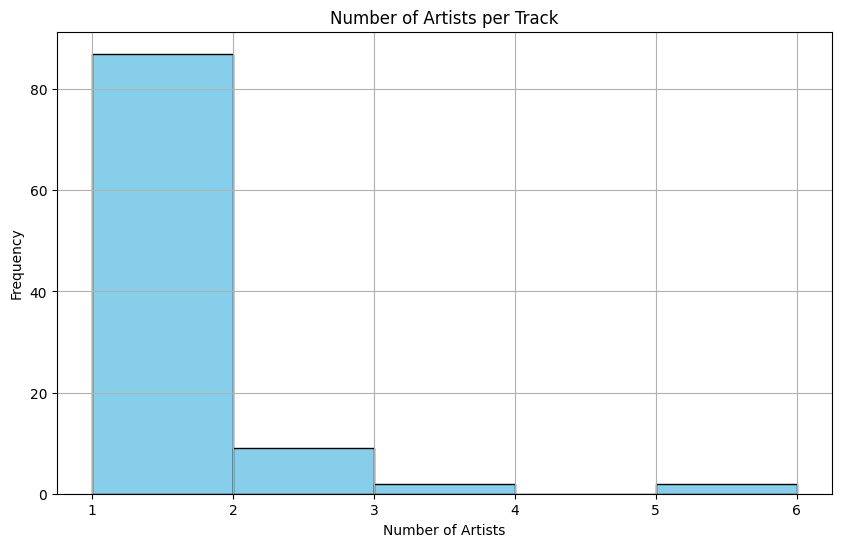

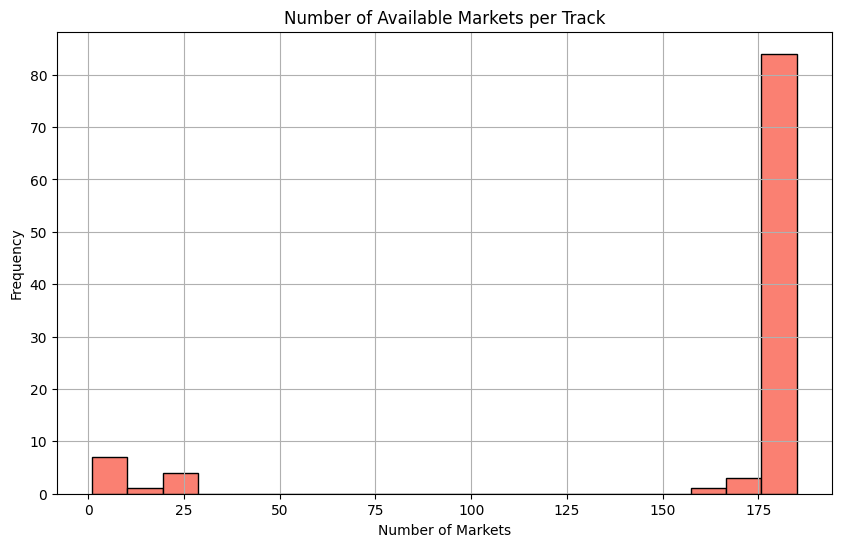

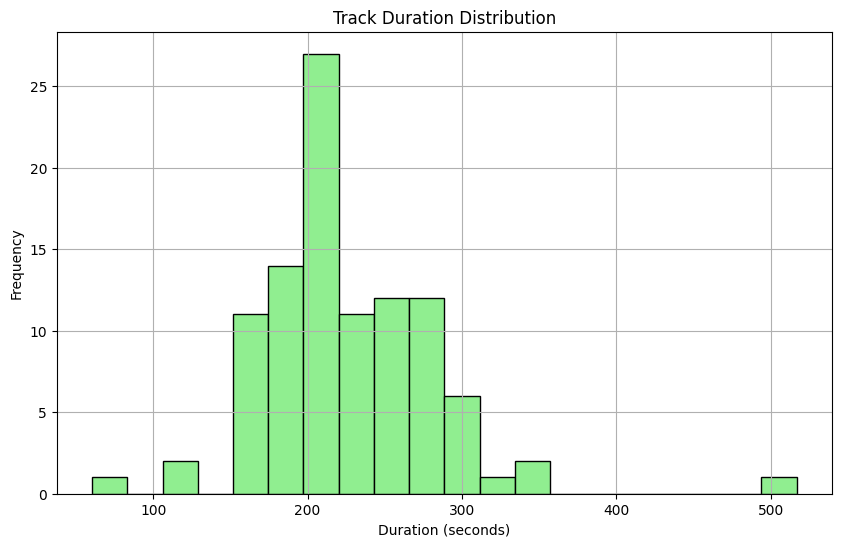

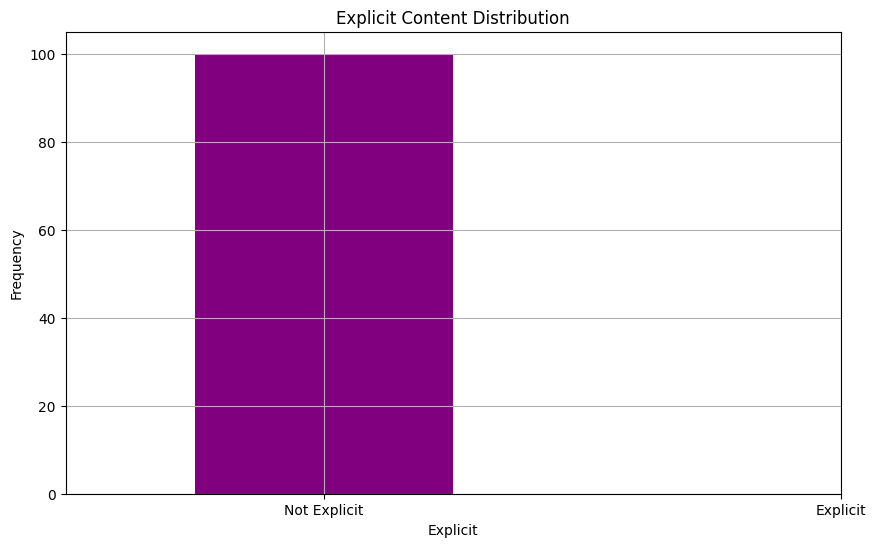

In [17]:

top100['num_artists'] = top100['track_info'].apply(lambda x: len(x['artists']) if x else 0)

top100['num_markets'] = top100['track_info'].apply(lambda x: len(x['available_markets']) if x else 0)

top100['duration_sec'] = top100['track_info'].apply(lambda x: x['duration_ms'] / 1000 if x else 0)

top100['explicit'] = top100['track_info'].apply(lambda x: x['explicit'] if x else False)

plt.figure(figsize=(10, 6))
plt.hist(top100['num_artists'], bins=range(1, top100['num_artists'].max() + 2), color='skyblue', edgecolor='black')
plt.title('Number of Artists per Track')
plt.xlabel('Number of Artists')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(top100['num_markets'], bins=20, color='salmon', edgecolor='black')
plt.title('Number of Available Markets per Track')
plt.xlabel('Number of Markets')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(top100['duration_sec'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Track Duration Distribution')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
top100['explicit'].value_counts().plot(kind='bar', color=['purple', 'orange'])
plt.title('Explicit Content Distribution')
plt.xlabel('Explicit')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Not Explicit', 'Explicit'], rotation=0)
plt.grid(True)
plt.show()


In [ ]:
# Scraping Top 100 most streamed Songs on Spotify

In [18]:
url = 'https://kworb.net/spotify/songs.html'

response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

rows = soup.find_all('tr')

song_list = []
for row in rows:
    div = row.find('div')  
    if div: 
        div_text = div.text  
        song_list.append(div_text)

In [19]:
song_list

['The Weeknd - Blinding Lights',
 'Ed Sheeran - Shape of You',
 'Lewis Capaldi - Someone You Loved',
 'Harry Styles - As It Was',
 'Post Malone - Sunflower',
 'The Weeknd - Starboy',
 'Drake - One Dance',
 'The Kid LAROI - STAY',
 'Tones And I - Dance Monkey',
 'Imagine Dragons - Believer',
 'Glass Animals - Heat Waves',
 'The Neighbourhood - Sweater Weather',
 'Ed Sheeran - Perfect',
 'Post Malone - rockstar',
 'The Chainsmokers - Closer',
 "James Arthur - Say You Won't Let Go",
 'Billie Eilish - lovely',
 'Harry Styles - Watermelon Sugar',
 'Shawn Mendes - Señorita',
 'The Chainsmokers - Something Just Like This',
 "Dua Lipa - Don't Start Now",
 'Vance Joy - Riptide',
 'Hozier - Take Me to Church',
 'Juice WRLD - Lucid Dreams',
 'Ed Sheeran - Photograph',
 "Drake - God's Plan",
 'Tom Odell - Another Love',
 'OneRepublic - Counting Stars',
 'Billie Eilish - bad guy',
 'Queen - Bohemian Rhapsody',
 'Post Malone - Circles',
 'Ed Sheeran - Thinking out Loud',
 'Lady Gaga - Shallow',
 "Un

In [ ]:
# Preparing and Cleaning of Top 100 Most Streamed Spotify Songs

In [20]:
songs_split = [song.split(' - ') for song in song_list]

top2500 = pd.DataFrame(songs_split, columns=['artist', 'song', 'stuff'])

top2500 = top2500[['song', 'artist', 'stuff']]

In [21]:
top2500.stuff.value_counts()

stuff
We Don't Talk About Bruno    1
Name: count, dtype: int64

In [22]:
result = top2500[top2500['stuff'].str.contains("We Don't Talk About Bruno", case=False, na=False)]
result

,song,artist,stuff
2351,La Gaita,Carolina Gaitán,We Don't Talk About Bruno


In [23]:
top2500 = top2500.iloc[:100]

In [24]:
top2500.stuff.value_counts()

Series([], Name: count, dtype: int64)

In [25]:
top2500 = top2500.drop(columns=['stuff'])
top100spo = top2500.copy()

In [ ]:
# Getting Track IDs for Top 100 Most Streamed from Spotify

In [26]:

access_token = 'API_KEY'

search_url = "https://api.spotify.com/v1/search"

headers = {
    "Authorization": f"Bearer {access_token}"
}

def get_track_id(song, artist):
    query = f"track:{song} artist:{artist}"
    params = {
        "q": query,
        "type": "track",
        "limit": 1  # Wir wollen nur den ersten Treffer
    }
    
    response = requests.get(search_url, headers=headers, params=params)
    
    if response.status_code != 200:
        print(f"Fehler: HTTP {response.status_code}")
        print(response.text) 
        return None
    
    try:
        results = response.json()
    except ValueError:
        print("Fehler beim Dekodieren der JSON-Antwort")
        print(response.text)
        return None
    
    if 'tracks' in results and results['tracks']['items']:
        return results['tracks']['items'][0]['id']
    else:
        print("Kein passender Track gefunden.")
        return None

top100spo['track_id'] = top100spo.apply(lambda row: get_track_id(row['song'], row['artist']), axis=1)


Kein passender Track gefunden.
Kein passender Track gefunden.
Kein passender Track gefunden.
Kein passender Track gefunden.
Kein passender Track gefunden.


In [27]:
no_track_id_rows_spo = top100spo[top100spo['track_id'].isnull()]
no_track_id_rows_spo

,song,artist,track_id
25,God's Plan,Drake,None
33,Can't Hold Us,Unknown,None
34,Can't Hold Us,Macklemore & Ryan Lewis,None
63,Jocelyn Flores,Unknown,None
81,There's Nothing Holdin' Me Back,Shawn Mendes,None


In [ ]:
# Getting Missing Track IDs manually

In [28]:
top100spo.loc[top100spo['song'] == "God's Plan", 'track_id'] = '6DCZcSspjsKoFjzjrWoCdn'
top100spo.loc[top100spo['song'] == "Can't Hold Us", 'track_id'] = '22skzmqfdWrjJylampe0kt'
top100spo.loc[top100spo['song'] == "Shape of You", 'track_id'] = '7qiZfU4dY1lWllzX7mPBI3'
top100spo.loc[top100spo['song'] == "Thunder", 'track_id'] = '1zB4vmk8tFRmM9UULNzbLB'
top100spo.loc[top100spo['song'] == "Jocelyn Flores", 'track_id'] = '7n7BJoQinmgzPb8rg1kKYu'
top100spo.loc[top100spo['song'] == "Jocelyn Flores", 'artist'] = 'XXXTENTACION'
top100spo.loc[top100spo['song'] == "Levitating", 'track_id'] = '5uu0D02efCoFMQiLYFT32e'
top100spo.loc[top100spo['song'] == "There's Nothing Holdin' Me Back", 'track_id'] = '3bBknFVxhFjBIFX91HcneQ'
top100spo.loc[top100spo['song'] == "Save Your Tears", 'track_id'] = '5QO79kh1waicV47BqGRL3g'


In [29]:
top100spo

,song,artist,track_id
0,Blinding Lights,The Weeknd,0VjIjW4GlUZAMYd2vXMi3b
1,Shape of You,Ed Sheeran,7qiZfU4dY1lWllzX7mPBI3
2,Someone You Loved,Lewis Capaldi,7qEHsqek33rTcFNT9PFqLf
3,As It Was,Harry Styles,4Dvkj6JhhA12EX05fT7y2e
4,Sunflower,Post Malone,0RiRZpuVRbi7oqRdSMwhQY
5,Starboy,The Weeknd,7MXVkk9YMctZqd1Srtv4MB
6,One Dance,Drake,1zi7xx7UVEFkmKfv06H8x0
7,STAY,The Kid LAROI,567e29TDzLwZwfDuEpGTwo
8,Dance Monkey,Tones And I,2N8m6CYs74qQO4mjVcXO30
9,Believer,Imagine Dragons,0pqnGHJpmpxLKifKRmU6WP


In [ ]:
# Getting Track Information from Spotify

In [30]:

access_token = 'API_KEY'

track_url_template = "https://api.spotify.com/v1/tracks/{track_id}"
audio_features_url_template = "https://api.spotify.com/v1/audio-features/{track_id}"
audio_analysis_url_template = "https://api.spotify.com/v1/audio-analysis/{track_id}"

headers = {
    "Authorization": f"Bearer {access_token}"
}

top100spo['track_info'] = None
top100spo['audio_features'] = None
top100spo['audio_analysis'] = None

def fetch_spotify_data(track_id):
    # Track-Details
    track_url = track_url_template.format(track_id=track_id)
    track_response = requests.get(track_url, headers=headers)
    if track_response.status_code == 200:
        track_info = track_response.json()
    else:
        track_info = None
    
    audio_features_url = audio_features_url_template.format(track_id=track_id)
    audio_features_response = requests.get(audio_features_url, headers=headers)
    if audio_features_response.status_code == 200:
        audio_features = audio_features_response.json()
    else:
        audio_features = None

    audio_analysis_url = audio_analysis_url_template.format(track_id=track_id)
    audio_analysis_response = requests.get(audio_analysis_url, headers=headers)
    if audio_analysis_response.status_code == 200:
        audio_analysis = audio_analysis_response.json()
    else:
        audio_analysis = None
    
    return track_info, audio_features, audio_analysis

for index, row in top100spo.iterrows():
    track_id = row['track_id']
    track_info, audio_features, audio_analysis = fetch_spotify_data(track_id)
    
    top100spo.at[index, 'track_info'] = track_info
    top100spo.at[index, 'audio_features'] = audio_features
    top100spo.at[index, 'audio_analysis'] = audio_analysis


In [ ]:
# Retry to in case of inclompete Information

In [178]:


access_token = 'API_KEY'

track_url_template = "https://api.spotify.com/v1/tracks/{track_id}"
audio_features_url_template = "https://api.spotify.com/v1/audio-features/{track_id}"
audio_analysis_url_template = "https://api.spotify.com/v1/audio-analysis/{track_id}"

headers = {
    "Authorization": f"Bearer {access_token}"
}

def fetch_spotify_data(track_id):
    
    track_url = track_url_template.format(track_id=track_id)
    track_response = requests.get(track_url, headers=headers)
    if track_response.status_code == 200:
        track_info = track_response.json()
    else:
        track_info = None
    
    audio_features_url = audio_features_url_template.format(track_id=track_id)
    audio_features_response = requests.get(audio_features_url, headers=headers)
    if audio_features_response.status_code == 200:
        audio_features = audio_features_response.json()
    else:
        audio_features = None

    audio_analysis_url = audio_analysis_url_template.format(track_id=track_id)
    audio_analysis_response = requests.get(audio_analysis_url, headers=headers)
    if audio_analysis_response.status_code == 200:
        audio_analysis = audio_analysis_response.json()
    else:
        audio_analysis = None
    
    return track_info, audio_features, audio_analysis

def retry_failed_requests(df):
    for index, row in df.iterrows():
        if row['track_info'] is None or row['audio_features'] is None or row['audio_analysis'] is None:
            track_id = row['track_id']
            print(f"Retrying for track_id: {track_id}")
            track_info, audio_features, audio_analysis = fetch_spotify_data(track_id)
            
            # Speichern der Ergebnisse in den entsprechenden Spalten
            if track_info is not None:
                df.at[index, 'track_info'] = track_info
            if audio_features is not None:
                df.at[index, 'audio_features'] = audio_features
            if audio_analysis is not None:
                df.at[index, 'audio_analysis'] = audio_analysis

for index, row in top100spo.iterrows():
    track_id = row['track_id']
    track_info, audio_features, audio_analysis = fetch_spotify_data(track_id)
    
    top100spo.at[index, 'track_info'] = track_info
    top100spo.at[index, 'audio_features'] = audio_features
    top100spo.at[index, 'audio_analysis'] = audio_analysis

retry_failed_requests(top100spo)


Retrying for track_id: 3CRDbSIZ4r5MsZ0YwxuEkn
Retrying for track_id: 68Dni7IE4VyPkTOH9mRWHr
Retrying for track_id: 3QGsuHI8jO1Rx4JWLUh9jd


In [31]:
top100spo

,song,artist,track_id,track_info,audio_features,audio_analysis
0,Blinding Lights,The Weeknd,0VjIjW4GlUZAMYd2vXMi3b,"{'album': {'album_type': 'album', 'artists': [...","{'danceability': 0.513, 'energy': 0.73, 'key':...","{'meta': {'analyzer_version': '4.0.0', 'platfo..."
1,Shape of You,Ed Sheeran,7qiZfU4dY1lWllzX7mPBI3,"{'album': {'album_type': 'album', 'artists': [...","{'danceability': 0.825, 'energy': 0.652, 'key'...","{'meta': {'analyzer_version': '4.0.0', 'platfo..."
2,Someone You Loved,Lewis Capaldi,7qEHsqek33rTcFNT9PFqLf,"{'album': {'album_type': 'album', 'artists': [...","{'danceability': 0.501, 'energy': 0.405, 'key'...","{'meta': {'analyzer_version': '4.0.0', 'platfo..."
3,As It Was,Harry Styles,4Dvkj6JhhA12EX05fT7y2e,"{'album': {'album_type': 'album', 'artists': [...","{'danceability': 0.52, 'energy': 0.731, 'key':...","{'meta': {'analyzer_version': '4.0.0', 'platfo..."
4,Sunflower,Post Malone,0RiRZpuVRbi7oqRdSMwhQY,"{'album': {'album_type': 'album', 'artists': [...","{'danceability': 0.755, 'energy': 0.522, 'key'...","{'meta': {'analyzer_version': '4.0.0', 'platfo..."
5,Starboy,The Weeknd,7MXVkk9YMctZqd1Srtv4MB,"{'album': {'album_type': 'album', 'artists': [...","{'danceability': 0.679, 'energy': 0.587, 'key'...","{'meta': {'analyzer_version': '4.0.0', 'platfo..."
6,One Dance,Drake,1zi7xx7UVEFkmKfv06H8x0,"{'album': {'album_type': 'album', 'artists': [...","{'danceability': 0.792, 'energy': 0.625, 'key'...","{'meta': {'analyzer_version': '4.0.0', 'platfo..."
7,STAY,The Kid LAROI,567e29TDzLwZwfDuEpGTwo,"{'album': {'album_type': 'album', 'artists': [...","{'danceability': 0.591, 'energy': 0.764, 'key'...","{'meta': {'analyzer_version': '4.0.0', 'platfo..."
8,Dance Monkey,Tones And I,2N8m6CYs74qQO4mjVcXO30,"{'album': {'album_type': 'album', 'artists': [...","{'danceability': 0.824, 'energy': 0.587, 'key'...","{'meta': {'analyzer_version': '4.0.0', 'platfo..."
9,Believer,Imagine Dragons,0pqnGHJpmpxLKifKRmU6WP,"{'album': {'album_type': 'album', 'artists': [...","{'danceability': 0.776, 'energy': 0.78, 'key':...","{'meta': {'analyzer_version': '4.0.0', 'platfo..."


In [ ]:
# Checking Disribution of Audio Features for Top 100 Most Streamed Songs on Spotify

/var/folders/nt/x7knb0nj29bbk77zhhv8mz8c0000gn/T/ipykernel_21614/974039783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top100spo['danceability'] = top100spo['audio_features'].apply(lambda x: x['danceability'] if x else None)
/var/folders/nt/x7knb0nj29bbk77zhhv8mz8c0000gn/T/ipykernel_21614/974039783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top100spo['energy'] = top100spo['audio_features'].apply(lambda x: x['energy'] if x else None)
/var/folders/nt/x7knb0nj29bbk77zhhv8mz8c0000gn/T/ipykernel

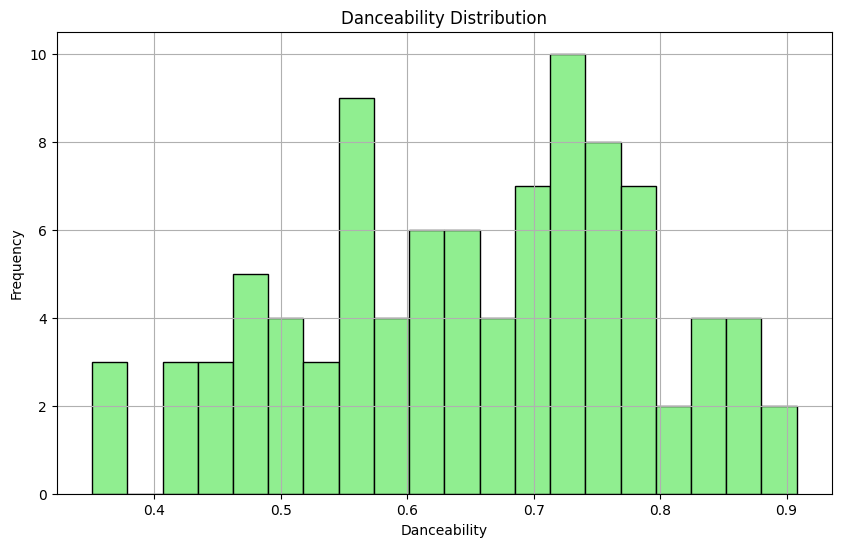

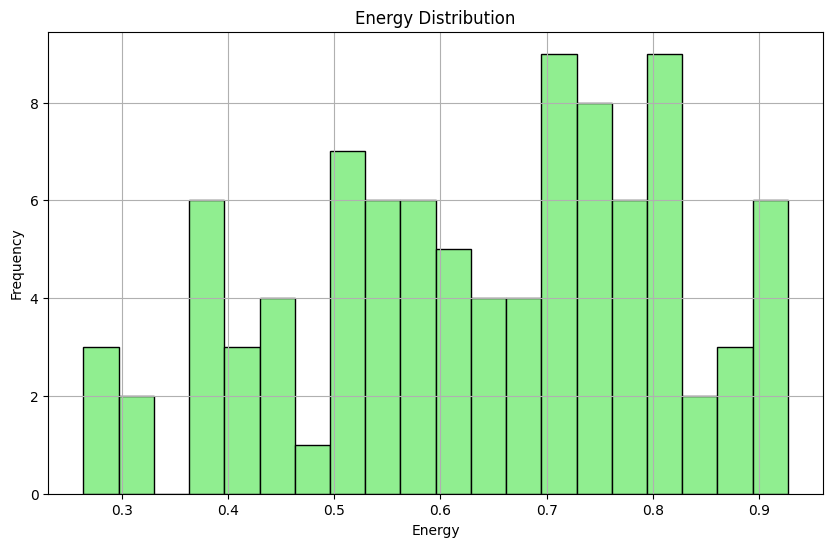

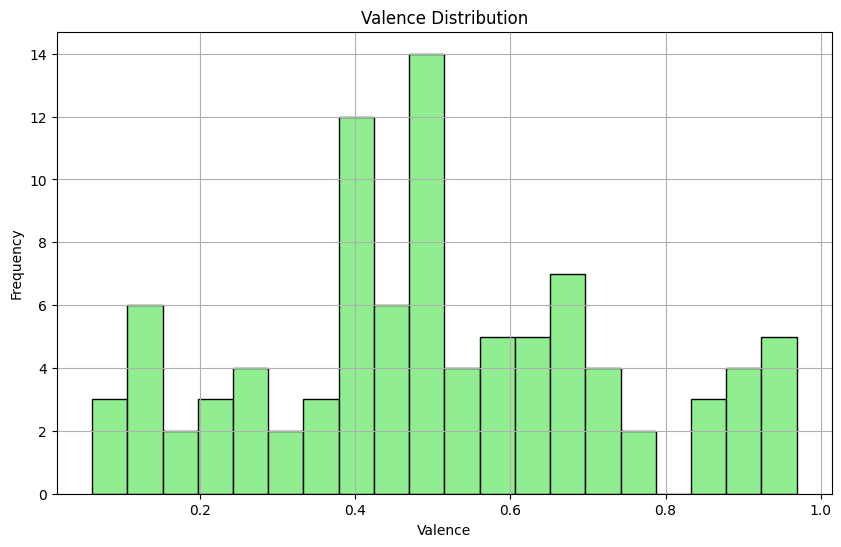

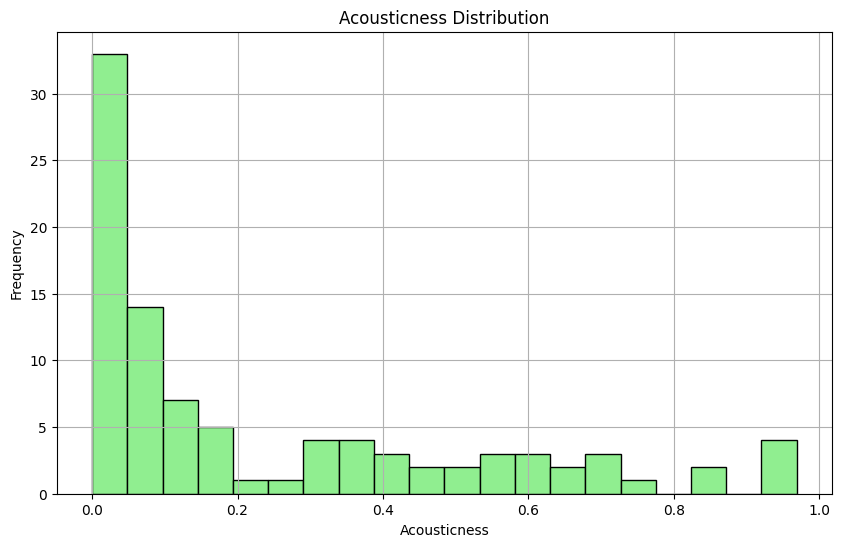

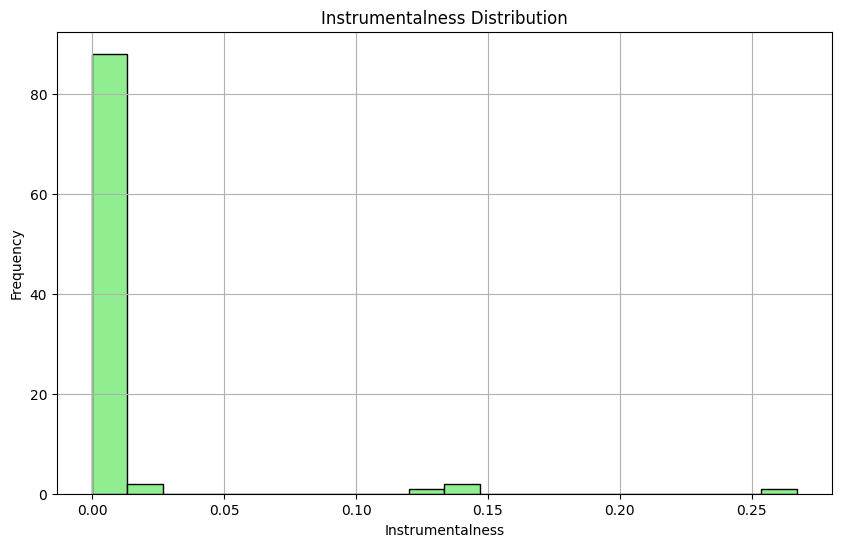

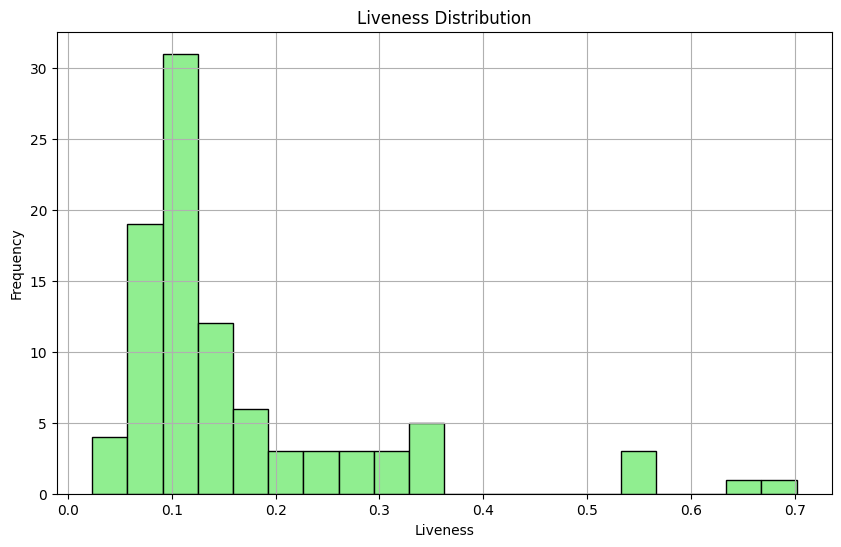

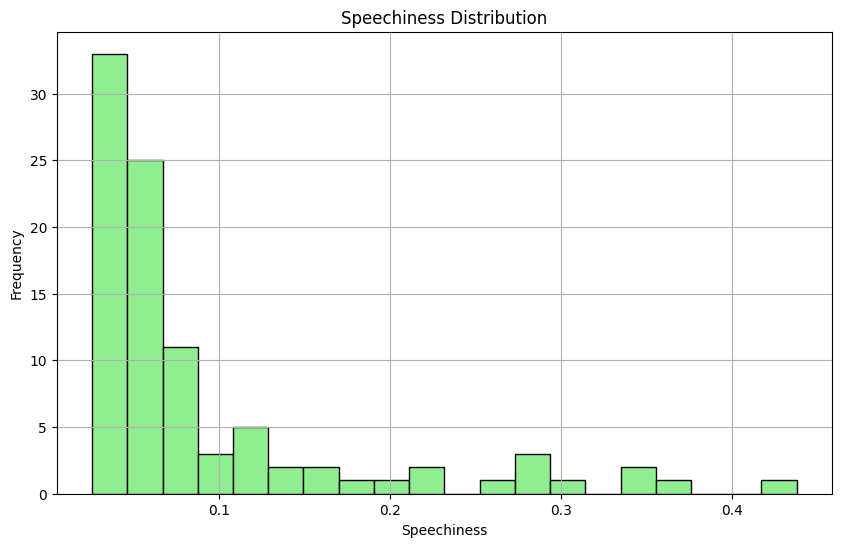

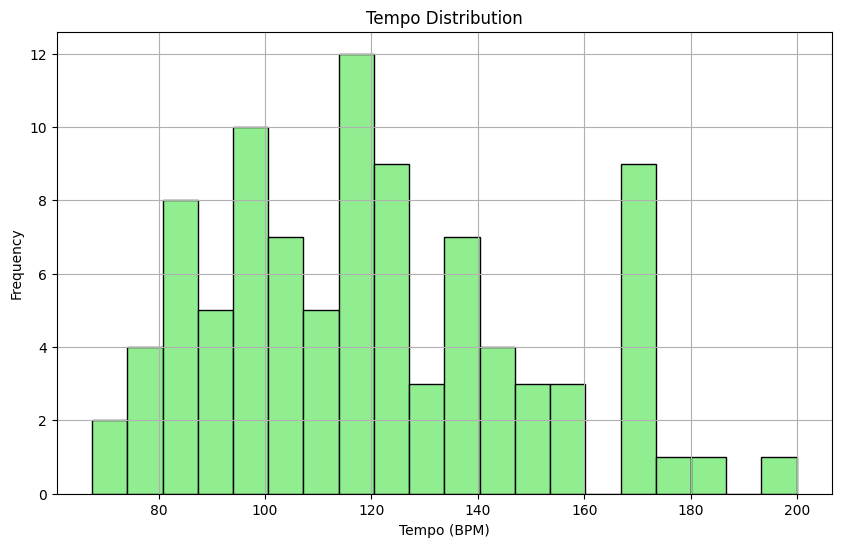

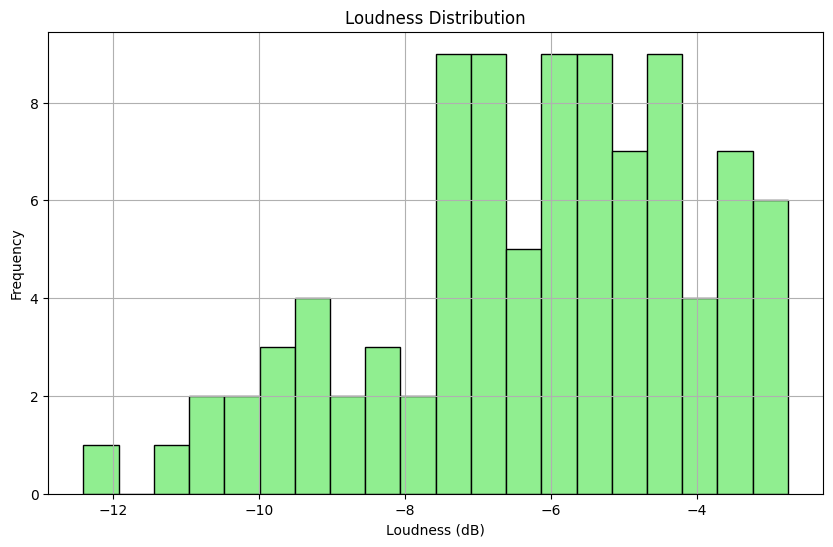

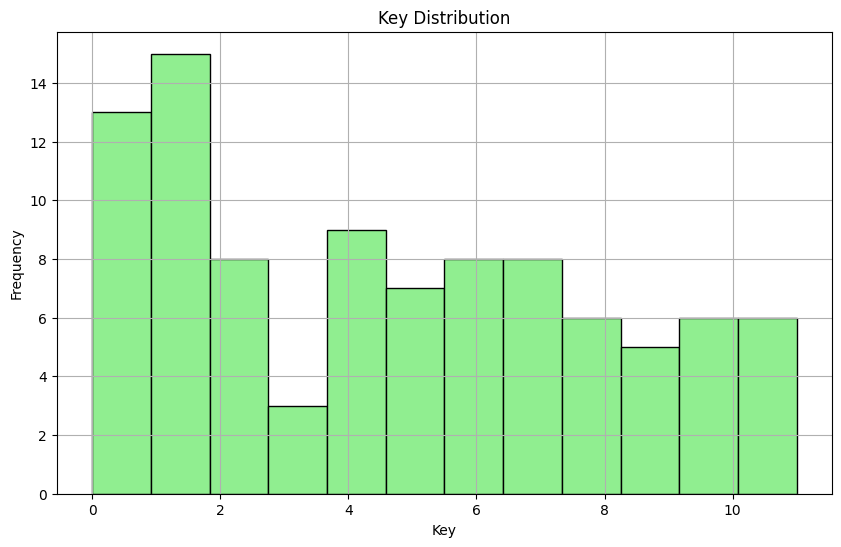

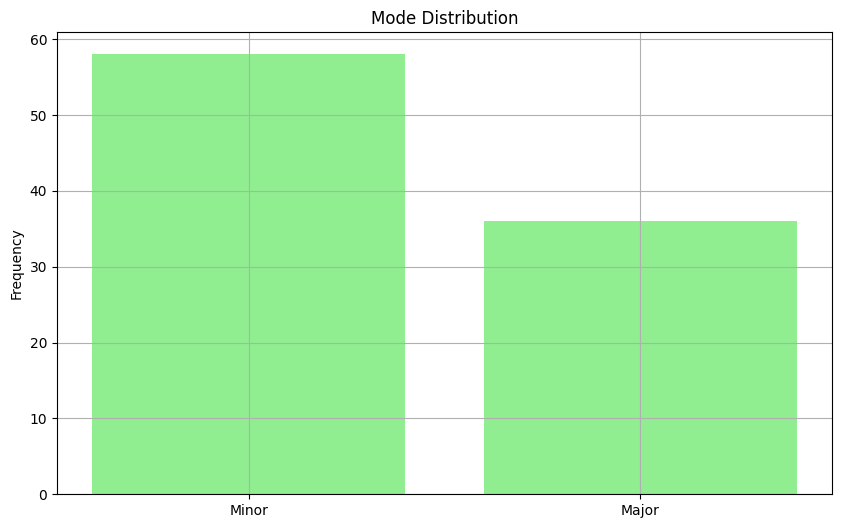

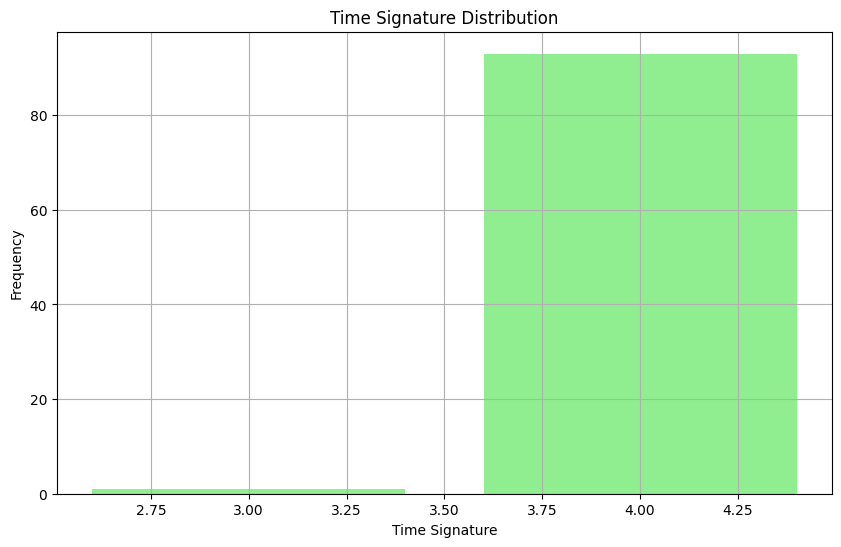

In [45]:


top100spo['danceability'] = top100spo['audio_features'].apply(lambda x: x['danceability'] if x else None)
top100spo['energy'] = top100spo['audio_features'].apply(lambda x: x['energy'] if x else None)
top100spo['valence'] = top100spo['audio_features'].apply(lambda x: x['valence'] if x else None)
top100spo['acousticness'] = top100spo['audio_features'].apply(lambda x: x['acousticness'] if x else None)
top100spo['instrumentalness'] = top100spo['audio_features'].apply(lambda x: x['instrumentalness'] if x else None)
top100spo['liveness'] = top100spo['audio_features'].apply(lambda x: x['liveness'] if x else None)
top100spo['speechiness'] = top100spo['audio_features'].apply(lambda x: x['speechiness'] if x else None)
top100spo['tempo'] = top100spo['audio_features'].apply(lambda x: x['tempo'] if x else None)
top100spo['loudness'] = top100spo['audio_features'].apply(lambda x: x['loudness'] if x else None)
top100spo['key'] = top100spo['audio_features'].apply(lambda x: x['key'] if x else None)
top100spo['mode'] = top100spo['audio_features'].apply(lambda x: x['mode'] if x else None)
top100spo['time_signature'] = top100spo['audio_features'].apply(lambda x: x['time_signature'] if x else None)

features = ['danceability', 'energy', 'valence', 'acousticness', 
            'instrumentalness', 'liveness', 'speechiness', 'tempo',
            'loudness', 'key', 'mode', 'time_signature']

for feature in features:
    plt.figure(figsize=(10, 6))
    
    if feature in ['danceability', 'energy', 'valence', 'acousticness', 
                   'instrumentalness', 'liveness', 'speechiness']:
        plt.hist(top100spo[feature].dropna(), bins=20, color='lightgreen', edgecolor='black')
        plt.title(f'{feature.capitalize()} Distribution')
        plt.xlabel(feature.capitalize())
        plt.ylabel('Frequency')
    
    elif feature == 'tempo':
        plt.hist(top100spo[feature].dropna(), bins=20, color='lightgreen', edgecolor='black')
        plt.title('Tempo Distribution')
        plt.xlabel('Tempo (BPM)')
        plt.ylabel('Frequency')
    
    elif feature == 'loudness':
        plt.hist(top100spo[feature].dropna(), bins=20, color='lightgreen', edgecolor='black')
        plt.title('Loudness Distribution')
        plt.xlabel('Loudness (dB)')
        plt.ylabel('Frequency')

    elif feature == 'key':
        plt.hist(top100spo[feature].dropna(), bins=12, color='lightgreen', edgecolor='black')
        plt.title('Key Distribution')
        plt.xlabel('Key')
        plt.ylabel('Frequency')

    elif feature == 'mode':
        plt.bar(['Minor', 'Major'], top100spo[feature].value_counts(), color='lightgreen')
        plt.title('Mode Distribution')
        plt.ylabel('Frequency')
    
    elif feature == 'time_signature':
        plt.bar(top100spo[feature].value_counts().index, top100spo[feature].value_counts().values, color='lightgreen')
        plt.title('Time Signature Distribution')
        plt.xlabel('Time Signature')
        plt.ylabel('Frequency')
    
    plt.grid(True)
    plt.show()


In [ ]:
# Checking Disribution of Track Features for Top 100 Most Streamed Songs on Spotify

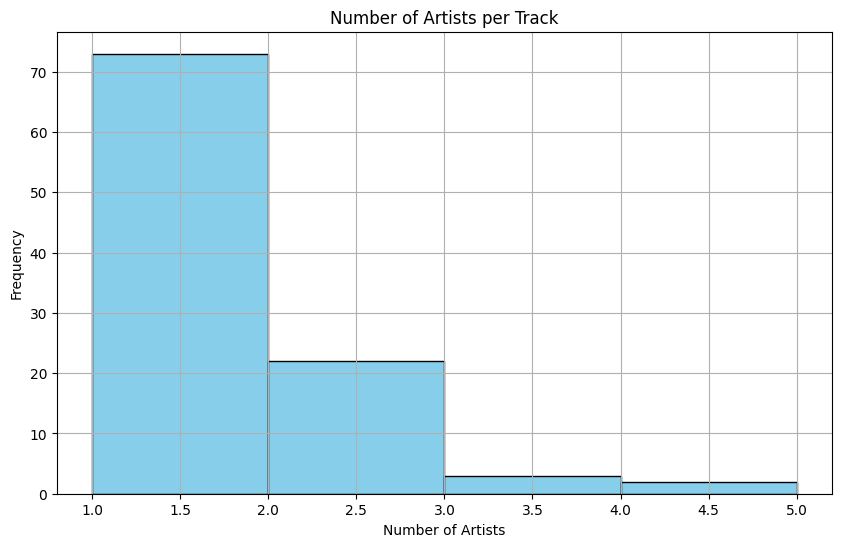

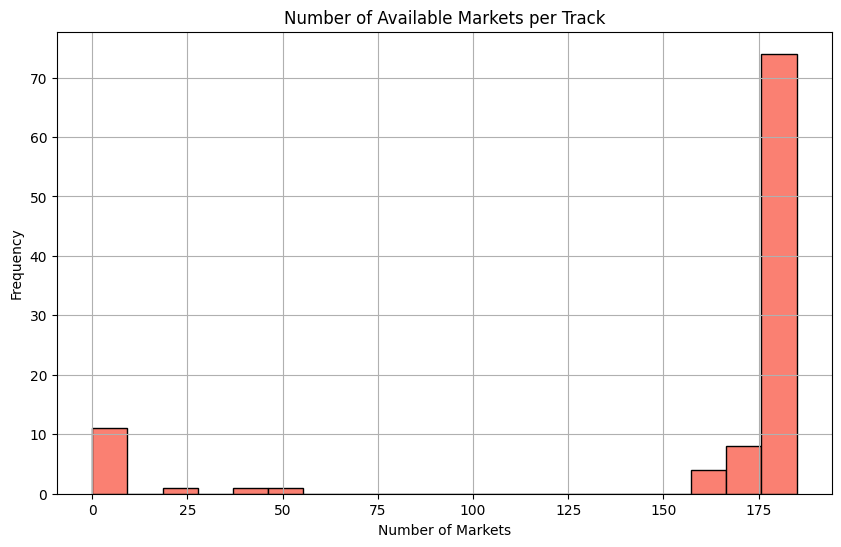

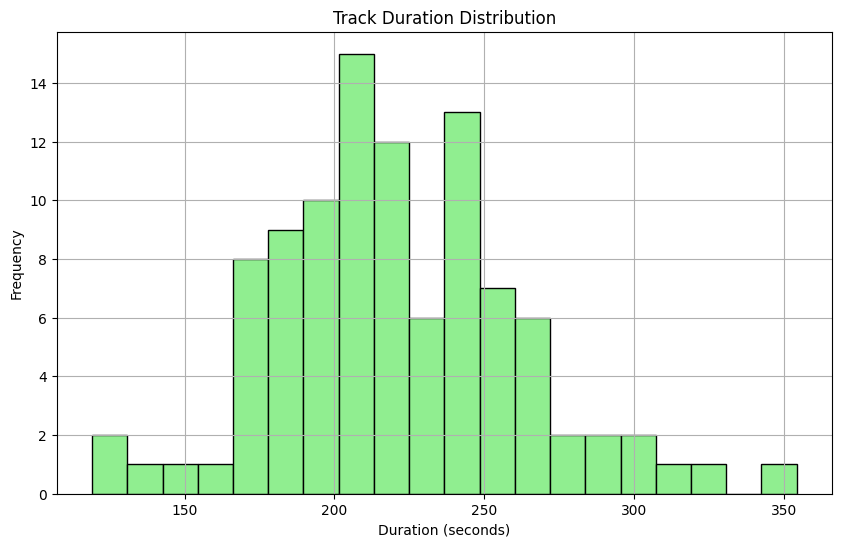

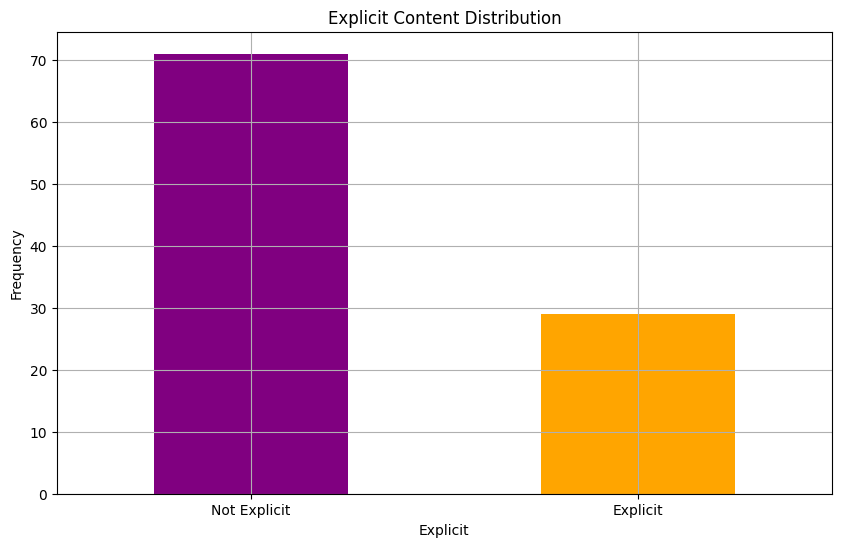

In [33]:


top100spo['num_artists'] = top100spo['track_info'].apply(lambda x: len(x['artists']) if x else 0)

top100spo['num_markets'] = top100spo['track_info'].apply(lambda x: len(x['available_markets']) if x else 0)

top100spo['duration_sec'] = top100spo['track_info'].apply(lambda x: x['duration_ms'] / 1000 if x else 0)

top100spo['explicit'] = top100spo['track_info'].apply(lambda x: x['explicit'] if x else False)

plt.figure(figsize=(10, 6))
plt.hist(top100spo['num_artists'], bins=range(1, top100spo['num_artists'].max() + 2), color='skyblue', edgecolor='black')
plt.title('Number of Artists per Track')
plt.xlabel('Number of Artists')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(top100spo['num_markets'], bins=20, color='salmon', edgecolor='black')
plt.title('Number of Available Markets per Track')
plt.xlabel('Number of Markets')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(top100spo['duration_sec'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Track Duration Distribution')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
top100spo['explicit'].value_counts().plot(kind='bar', color=['purple', 'orange'])
plt.title('Explicit Content Distribution')
plt.xlabel('Explicit')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Not Explicit', 'Explicit'], rotation=0)
plt.grid(True)
plt.show()


In [ ]:
# Removing Songs which appear in both Top 100s

In [35]:
duplicate_songs = top100[top100['song'].isin(top100spo['song'])]

num_duplicates = len(duplicate_songs)

duplicate_songs

,song,artist,track_id,track_info,audio_features,audio_analysis,danceability,energy,valence,acousticness,instrumentalness,liveness,speechiness,tempo,loudness,key,mode,time_signature,num_artists,num_markets,duration_sec,explicit
2,Shallow,Lady Gaga & Bradley Cooper (A Star is Born),2VxeLyX666F8uXCJ0dZF8B,"{'album': {'album_type': 'album', 'artists': [...","{'danceability': 0.577, 'energy': 0.385, 'key'...","{'meta': {'analyzer_version': '4.0.0', 'platfo...",0.577,0.385,0.331,0.371000,0.0,0.231,0.0300,95.820,-6.362,7,1,4,2,179,215.733,False
4,Perfect,Ed Sheeran,0tgVpDi06FyKpA1z0VMD4v,"{'album': {'album_type': 'album', 'artists': [...","{'danceability': 0.599, 'energy': 0.448, 'key'...","{'meta': {'analyzer_version': '4.0.0', 'platfo...",0.599,0.448,0.168,0.163000,0.0,0.106,0.0232,95.050,-6.312,8,1,3,1,184,263.400,False
6,Someone You Loved,Lewis Capaldi,7qEHsqek33rTcFNT9PFqLf,"{'album': {'album_type': 'album', 'artists': [...","{'danceability': 0.501, 'energy': 0.405, 'key'...","{'meta': {'analyzer_version': '4.0.0', 'platfo...",0.501,0.405,0.446,0.751000,0.0,0.105,0.0319,109.891,-5.679,1,1,4,1,184,182.160,False
12,Bohemian Rhapsody,Queen,7tFiyTwD0nx5a1eklYtX2J,"{'album': {'album_type': 'album', 'artists': [...","{'danceability': 0.391, 'energy': 0.402, 'key'...","{'meta': {'analyzer_version': '4.0.0', 'platfo...",0.391,0.402,0.228,0.289000,0.0,0.243,0.0539,143.879,-9.961,0,0,4,1,2,354.320,False
26,Don't Stop Me Now,Queen,6wd1Jf5UJZIuiFM4cjVBAK,"{'album': {'album_type': 'album', 'artists': [...","{'danceability': 0.493, 'energy': 0.865, 'key'...","{'meta': {'analyzer_version': '4.0.0', 'platfo...",0.493,0.865,0.417,0.173000,0.0,0.775,0.1170,158.788,-7.499,4,1,4,2,185,207.000,False
42,Wonderwall,Oasis,7ygpwy2qP3NbrxVkHvUhXY,"{'album': {'album_type': 'album', 'artists': [...","{'danceability': 0.375, 'energy': 0.893, 'key'...","{'meta': {'analyzer_version': '4.0.0', 'platfo...",0.375,0.893,0.434,0.000509,0.0,0.187,0.0406,174.323,-4.097,2,1,4,1,25,258.773,False


In [36]:
top100 = top100[~top100['song'].isin(duplicate_songs['song'])]
top100spo = top100spo[~top100spo['song'].isin(duplicate_songs['song'])]

In [ ]:
# Statistical Tests

In [40]:
statistic_tests_num = ['danceability', 'energy', 'valence', 'acousticness',	'instrumentalness',	'liveness', 'speechiness', 'tempo',	'loudness', 'time_signature', 'num_artists', 'num_markets', 'duration_sec']

In [47]:


alpha = 0.05  # Significance level

for column in statistic_tests_num:
    # Calculate the mean for both playlists
    mean_top100 = top100[column].mean()
    mean_top100spo = top100spo[column].mean()
    
    print(f"\nAnalyzing column: {column}")
    print(f"Mean {column} in top100: {mean_top100}")
    print(f"Mean {column} in top100spo: {mean_top100spo}")
    
    # Test for normality using Shapiro-Wilk test
    shapiro_top100 = stats.shapiro(top100[column])
    shapiro_top100spo = stats.shapiro(top100spo[column])
    
    print(f"Shapiro-Wilk Test for {column} in top100: W={shapiro_top100[0]}, p-value={shapiro_top100[1]}")
    print(f"Shapiro-Wilk Test for {column} in top100spo: W={shapiro_top100spo[0]}, p-value={shapiro_top100spo[1]}")
    
    normality_top100 = shapiro_top100[1] > alpha
    normality_top100spo = shapiro_top100spo[1] > alpha

    if not (normality_top100 and normality_top100spo):
        print(f"The distribution of {column} is not normal in at least one of the playlists. Performing Mann-Whitney U Test in addition to t-test.")
    
    # Perform the t-test for independent samples
    t_stat, p_value_ttest = stats.ttest_ind(top100[column], top100spo[column], equal_var=False)
    
    print(f"T-Statistic for {column}: {t_stat}")
    print(f"P-Value for {column}: {p_value_ttest}")
    
    if p_value_ttest < alpha:
        print(f"There is a statistically significant difference in {column} between the two playlists.")
        cohen_d = (mean_top100 - mean_top100spo) / np.sqrt((np.std(top100[column]) ** 2 + np.std(top100spo[column]) ** 2) / 2)
        print(f"Cohen's d for {column}: {cohen_d}")
    else:
        print(f"There is no statistically significant difference in {column} between the two playlists.")
    
    if not (normality_top100 and normality_top100spo):
        mw_stat, p_value_mwtest = stats.mannwhitneyu(top100[column], top100spo[column], alternative='two-sided')
        
        print(f"Mann-Whitney U Test Statistic for {column}: {mw_stat}")
        print(f"P-Value for Mann-Whitney U Test for {column}: {p_value_mwtest}")
        
        if p_value_mwtest < alpha:
            print(f"There is a statistically significant difference in {column} between the two playlists (Mann-Whitney U Test).")
            
            # Calulating Z for Mann-Whitney U-Test
            n1 = len(top100[column])
            n2 = len(top100spo[column])
            u_mean = n1 * n2 / 2
            u_std = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
            z = (mw_stat - u_mean) / u_std

            # calculating effect r
            r = z / np.sqrt(n1 + n2)
            print(f"Effect size (r) for Mann-Whitney U Test for {column}: {r}")
        else:
            print(f"There is no statistically significant difference in {column} between the two playlists (Mann-Whitney U Test).")



Analyzing column: danceability
Mean danceability in top100: 0.511968085106383
Mean danceability in top100spo: 0.6505425531914893
Shapiro-Wilk Test for danceability in top100: W=0.9937276244163513, p-value=0.9416417479515076
Shapiro-Wilk Test for danceability in top100spo: W=0.977568507194519, p-value=0.1059068813920021
T-Statistic for danceability: -5.983798325095127
P-Value for danceability: 1.2099121524862386e-08
There is a statistically significant difference in danceability between the two playlists.
Cohen's d for danceability: -0.8775067612448064

Analyzing column: energy
Mean energy in top100: 0.4824776595744681
Mean energy in top100spo: 0.6388510638297872
Shapiro-Wilk Test for energy in top100: W=0.9757456183433533, p-value=0.07761046290397644
Shapiro-Wilk Test for energy in top100spo: W=0.969732403755188, p-value=0.028002964332699776
The distribution of energy is not normal in at least one of the playlists. Performing Mann-Whitney U Test in addition to t-test.
T-Statistic for 